In [37]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools

from kernels_class import *
from rbf_kernel import *
from generation import *

In [38]:
def plot_boxplots(res, pi_estimator, col_var, par_names):
    df = res[par_names  + ['pi_'+pi_estimator+'_u','pi_'+pi_estimator+'_v']]
    df["id"] = df.index
    df = pd.wide_to_long(df, stubnames='pi_'+pi_estimator, i='id', j='uv', sep="_", suffix='[uv]')

    g = sns.FacetGrid(df, row='pi_target', col=col_var, height=4, aspect=1.5)
    palette = {'u': '#1f77b4', 'v': '#ff7f0e'} 
    g.map_dataframe(sns.boxplot, y='pi_'+pi_estimator, hue='uv', x='n_target', palette=palette)
    g.add_legend()

    for (pi_target_val, beta_val), ax in g.axes_dict.items():
        ax.axhline(y=pi_target_val, color='red', linestyle='--', linewidth=1.5)
    plt.show()

In [39]:
def plot_boxplots_error(res, pi_estimator, col_var, par_names):
    df = res[par_names  + ['pi_'+pi_estimator+'_u','pi_'+pi_estimator+'_v']]
    df["id"] = df.index
    df = pd.wide_to_long(df, stubnames='pi_'+pi_estimator, i='id', j='uv', sep="_", suffix='[uv]')
    df['pi_'+pi_estimator] = (df['pi_'+pi_estimator] - df['pi_target'])**2

    g = sns.FacetGrid(df, row='pi_target', col=col_var, height=4, aspect=1.5)
    palette = {'u': '#1f77b4', 'v': '#ff7f0e'} 
    g.map_dataframe(sns.boxplot, y='pi_'+pi_estimator, hue='uv', x='n_target', palette=palette)
    g.add_legend()
    
    plt.show()

In [59]:
def plot_boxplot_one(res, col_var, par_names):
    df = res[par_names  + ['pi_nmr_u','pi_nmr_v', 'pi_ipr_u','pi_ipr_v']]
    df["id"] = df.index
    df = pd.wide_to_long(df, stubnames=['pi'], i='id', j='est', sep="_", suffix=r'(nmr_u|nmr_v|ipr_u|ipr_v)')
    df = df.reset_index()

    g = sns.FacetGrid(df, row='pi_target', col=col_var, height=4, aspect=1.5)
    palette = {'nmr_u': '#1f77b4', 'nmr_v': "#96c5e6",  'ipr_u': '#ff7f0e', 'ipr_v': "#d7b89e"} 
    g.map_dataframe(sns.boxplot, y='pi', hue='est', x='n_target', palette=palette)
    g.add_legend()

    for (pi_target_val, beta_val), ax in g.axes_dict.items():
        ax.axhline(y=pi_target_val, color='red', linestyle='--', linewidth=1.5)
        ax.set_ylabel('hat pi_target')
        ax.set_xlabel('n_plus = n_minus = n_target')
    # plt.show()
    

In [69]:
def plot_boxplot_one_v2(res, col_var, par_names):
    df = res[par_names  + ['pi_nmr_u','pi_nmr_v', 'pi_ipr_u','pi_ipr_v']]
    df = df.reset_index()
    df["id"] = df.index
    df = pd.wide_to_long(df, stubnames=['pi'], i='id', j='est', sep="_", suffix=r'(nmr_u|nmr_v|ipr_u|ipr_v)')
    df = df.reset_index()
    
    g = sns.FacetGrid(df, row='pi_target', height=6, aspect=1.5, sharey=False)
    palette = {'nmr_u': '#1f77b4', 'nmr_v': "#96c5e6",  'ipr_u': '#ff7f0e', 'ipr_v': "#d7b89e"} 
    g.map_dataframe(sns.boxplot, y='pi', hue='est', x=col_var, palette=palette)
    g.add_legend()

    for _, ax in g.axes_dict.items():
        ax.set_ylabel('hat pi_target')
    #     ax.axhline(y=pi_target_val, color='red', linestyle='--', linewidth=1.5)
    plt.show()
    

In [42]:
def plot_boxplot_error_one(res, col_var, par_names):
    df = res[par_names  + ['pi_nmr'+'_u','pi_'+'nmr'+'_v', 'pi_ipr_u','pi_ipr_v']]
    df["id"] = df.index
    df = pd.wide_to_long(df, stubnames=['pi'], i='id', j='est', sep="_", suffix=r'(nmr_u|nmr_v|ipr_u|ipr_v)')
    df = df.reset_index()
    df['pi'] = (df['pi'] - df['pi_target'])**2

    g = sns.FacetGrid(df, row='pi_target', col=col_var, height=4, aspect=1.5)
    palette = {'nmr_u': '#1f77b4', 'nmr_v': "#96c5e6",  'ipr_u': '#ff7f0e', 'ipr_v': "#d7b89e"} 
    g.map_dataframe(sns.boxplot, y='pi', hue='est', x='n_target', palette=palette)
    g.add_legend()

    plt.show()

# Std-normal, Std-normal: changing mu

In [51]:
params = {'beta': [0.5, 1, 1.5],
          'n_plus': [500],
          'n_minus': [500], 
          'n_target': [500], 
          'pi_target': [0.1, 0.3, 0.5, 0.7, 0.9],
          'p': [int(5)],
          'seed': [int(i) for i in np.linspace(1, 100, 100)]}

In [52]:
df_params = pd.DataFrame(itertools.product(*params.values()),columns=params.keys())

In [53]:
for n0 in [50, 100, 250, 1000]:
    params0 = {'beta': [0.5, 1, 1.5],
            'n_plus': [n0],
            'n_minus': [n0], 
            'n_target': [n0], 
            'pi_target': [0.1, 0.3, 0.5, 0.7, 0.9],
            'p': [int(5)],
            'seed': [int(i) for i in np.linspace(1, 100, 100)]}
    df_params0 = pd.DataFrame(itertools.product(*params0.values()),columns=params0.keys())
    df_params = pd.concat((df_params, df_params0), ignore_index=True)


In [54]:
res = simulation(df_params, generate_sample_Nstd_Nstd_CC, params.keys(), 
           ['pi_nmr_u', 'pi_ipr_u', 
            'pi_nmr_v', 'pi_ipr_v', 
            'var_plug-in', 'var_explicit'])

100%|██████████| 7500/7500 [09:40<00:00, 12.91it/s] 


In [57]:
res.to_csv('results/01_simulation_estimators_UV_v1.csv', index=False)

In [162]:
# plot_boxplots(res, 'nmr', 'beta', df_params.keys().to_list())

/tmp/ipykernel_1226/929276379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["id"] = df.index


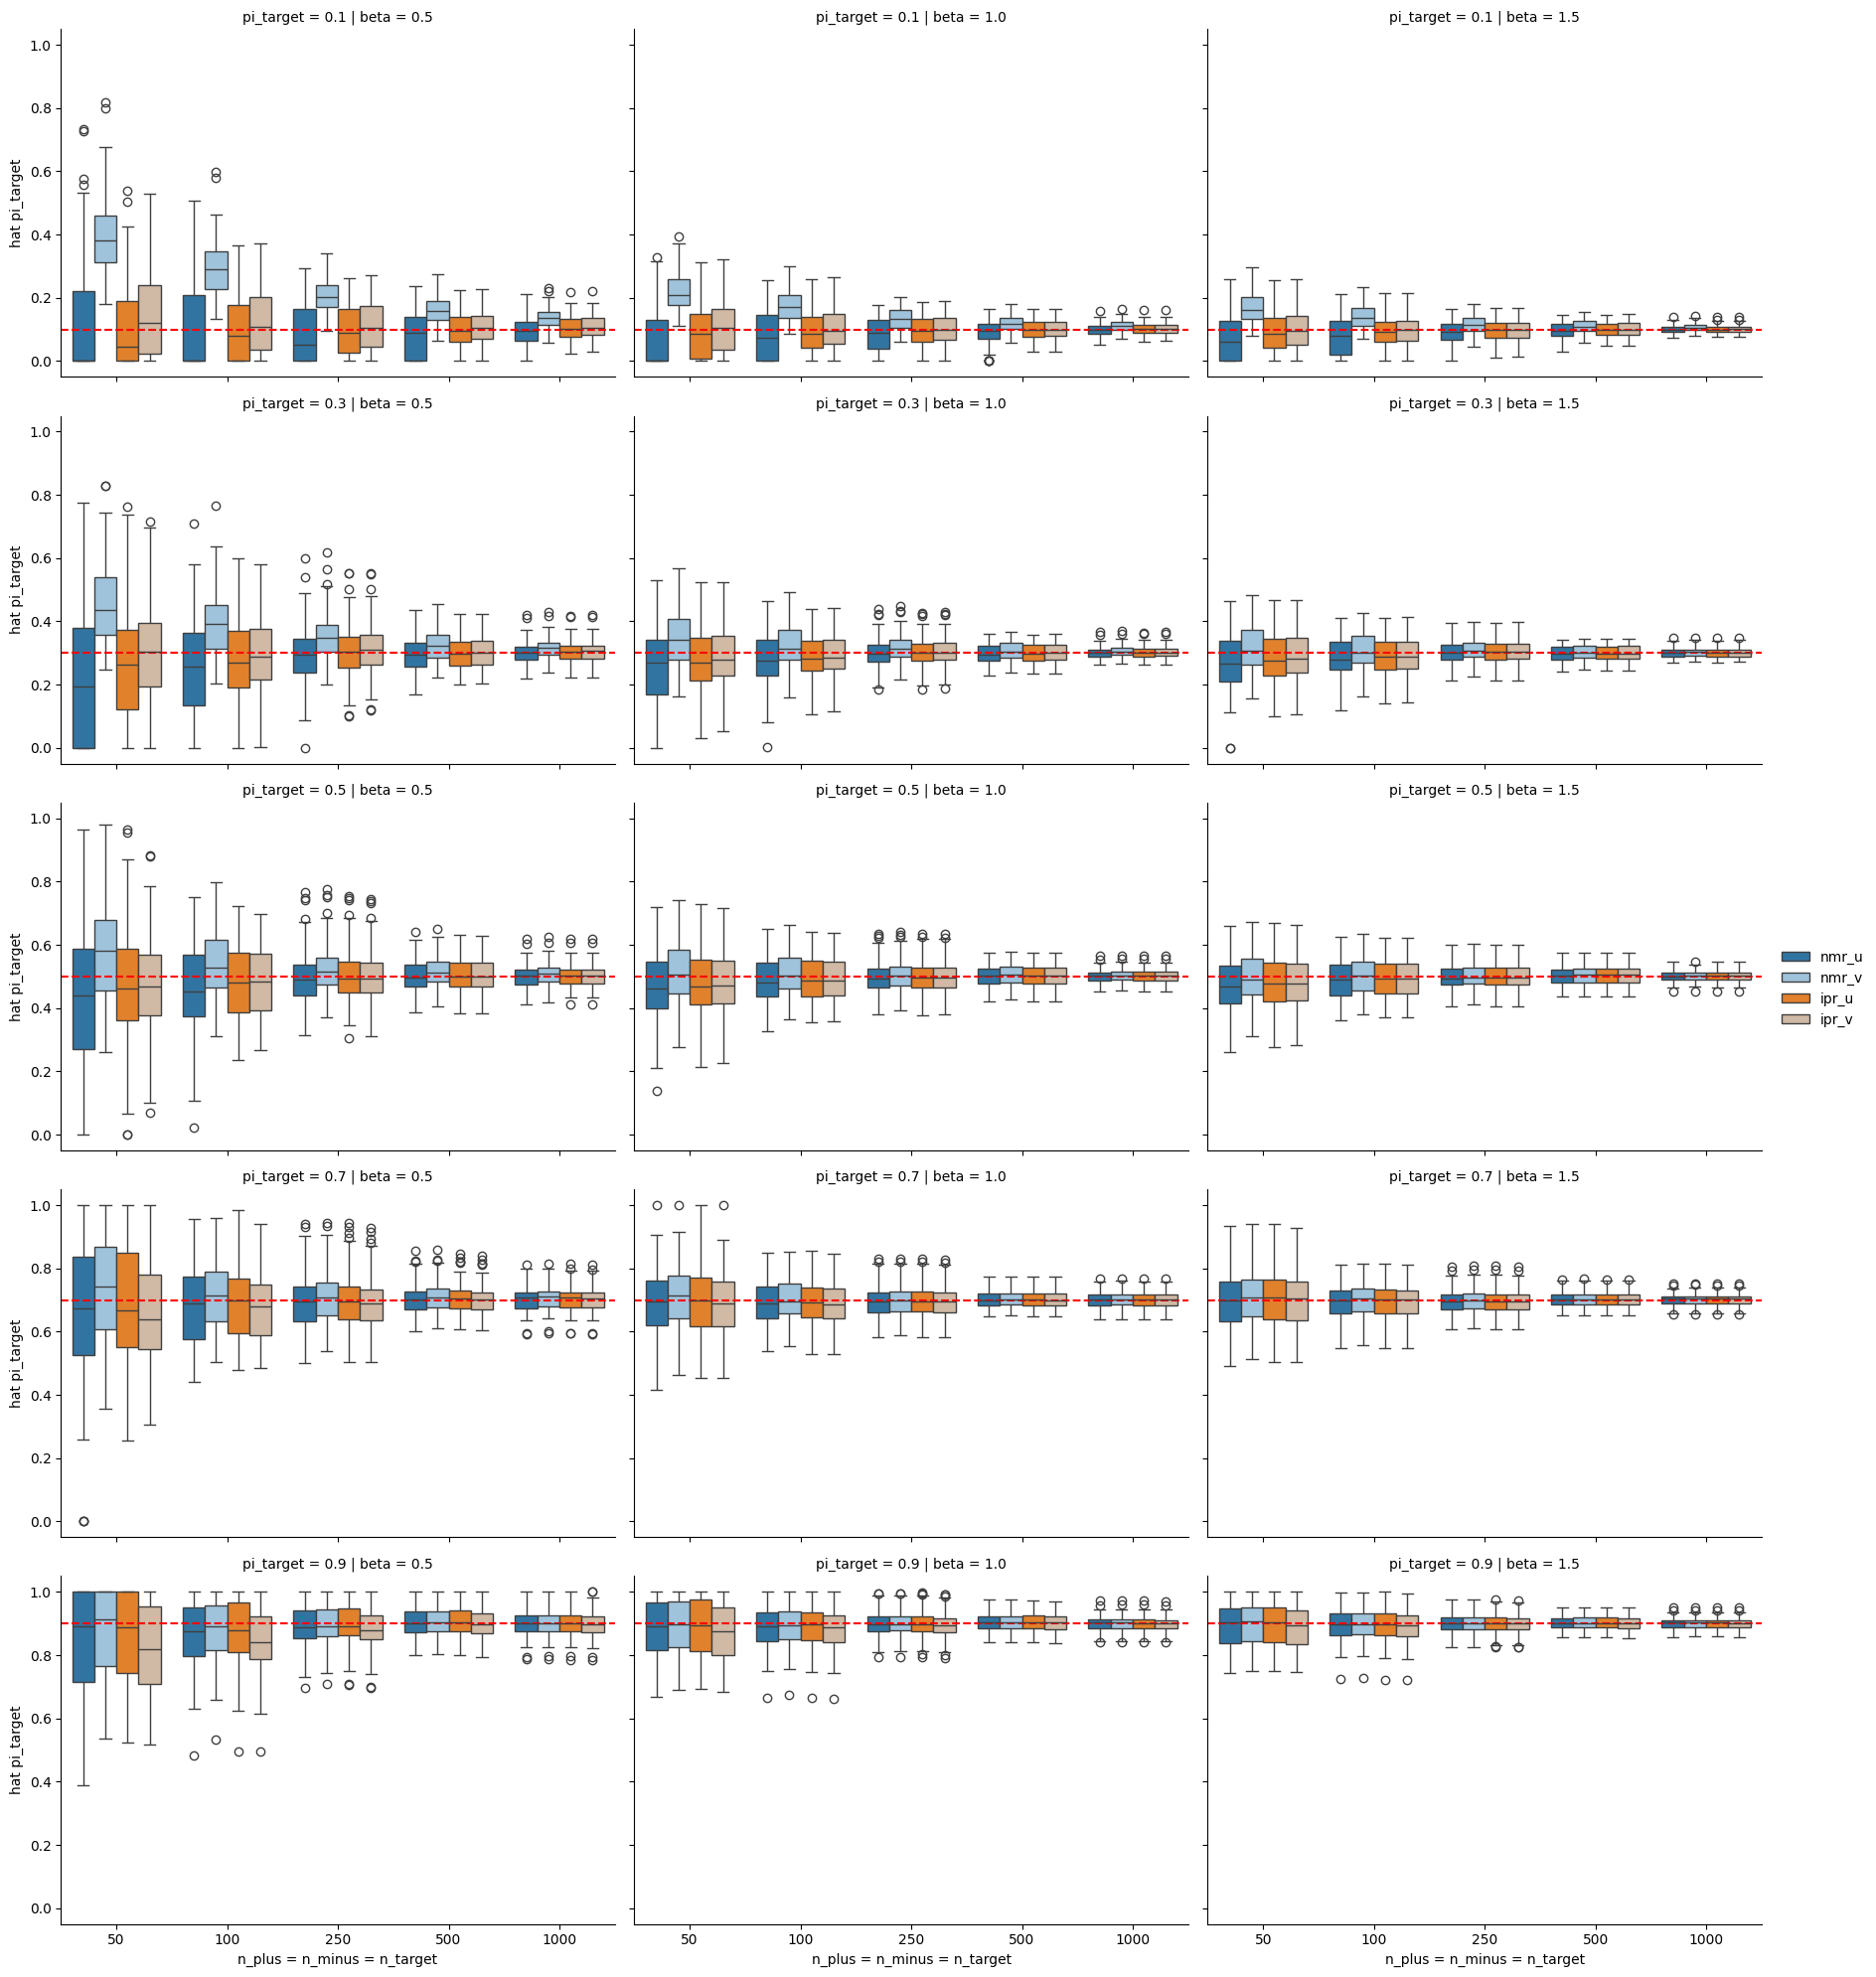

In [60]:
plot_boxplot_one(res, 'beta', df_params.keys().to_list())
plt.savefig('results/01_simulation_estimators_UV_v1.png')

/tmp/ipykernel_1226/3614799658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["id"] = df.index


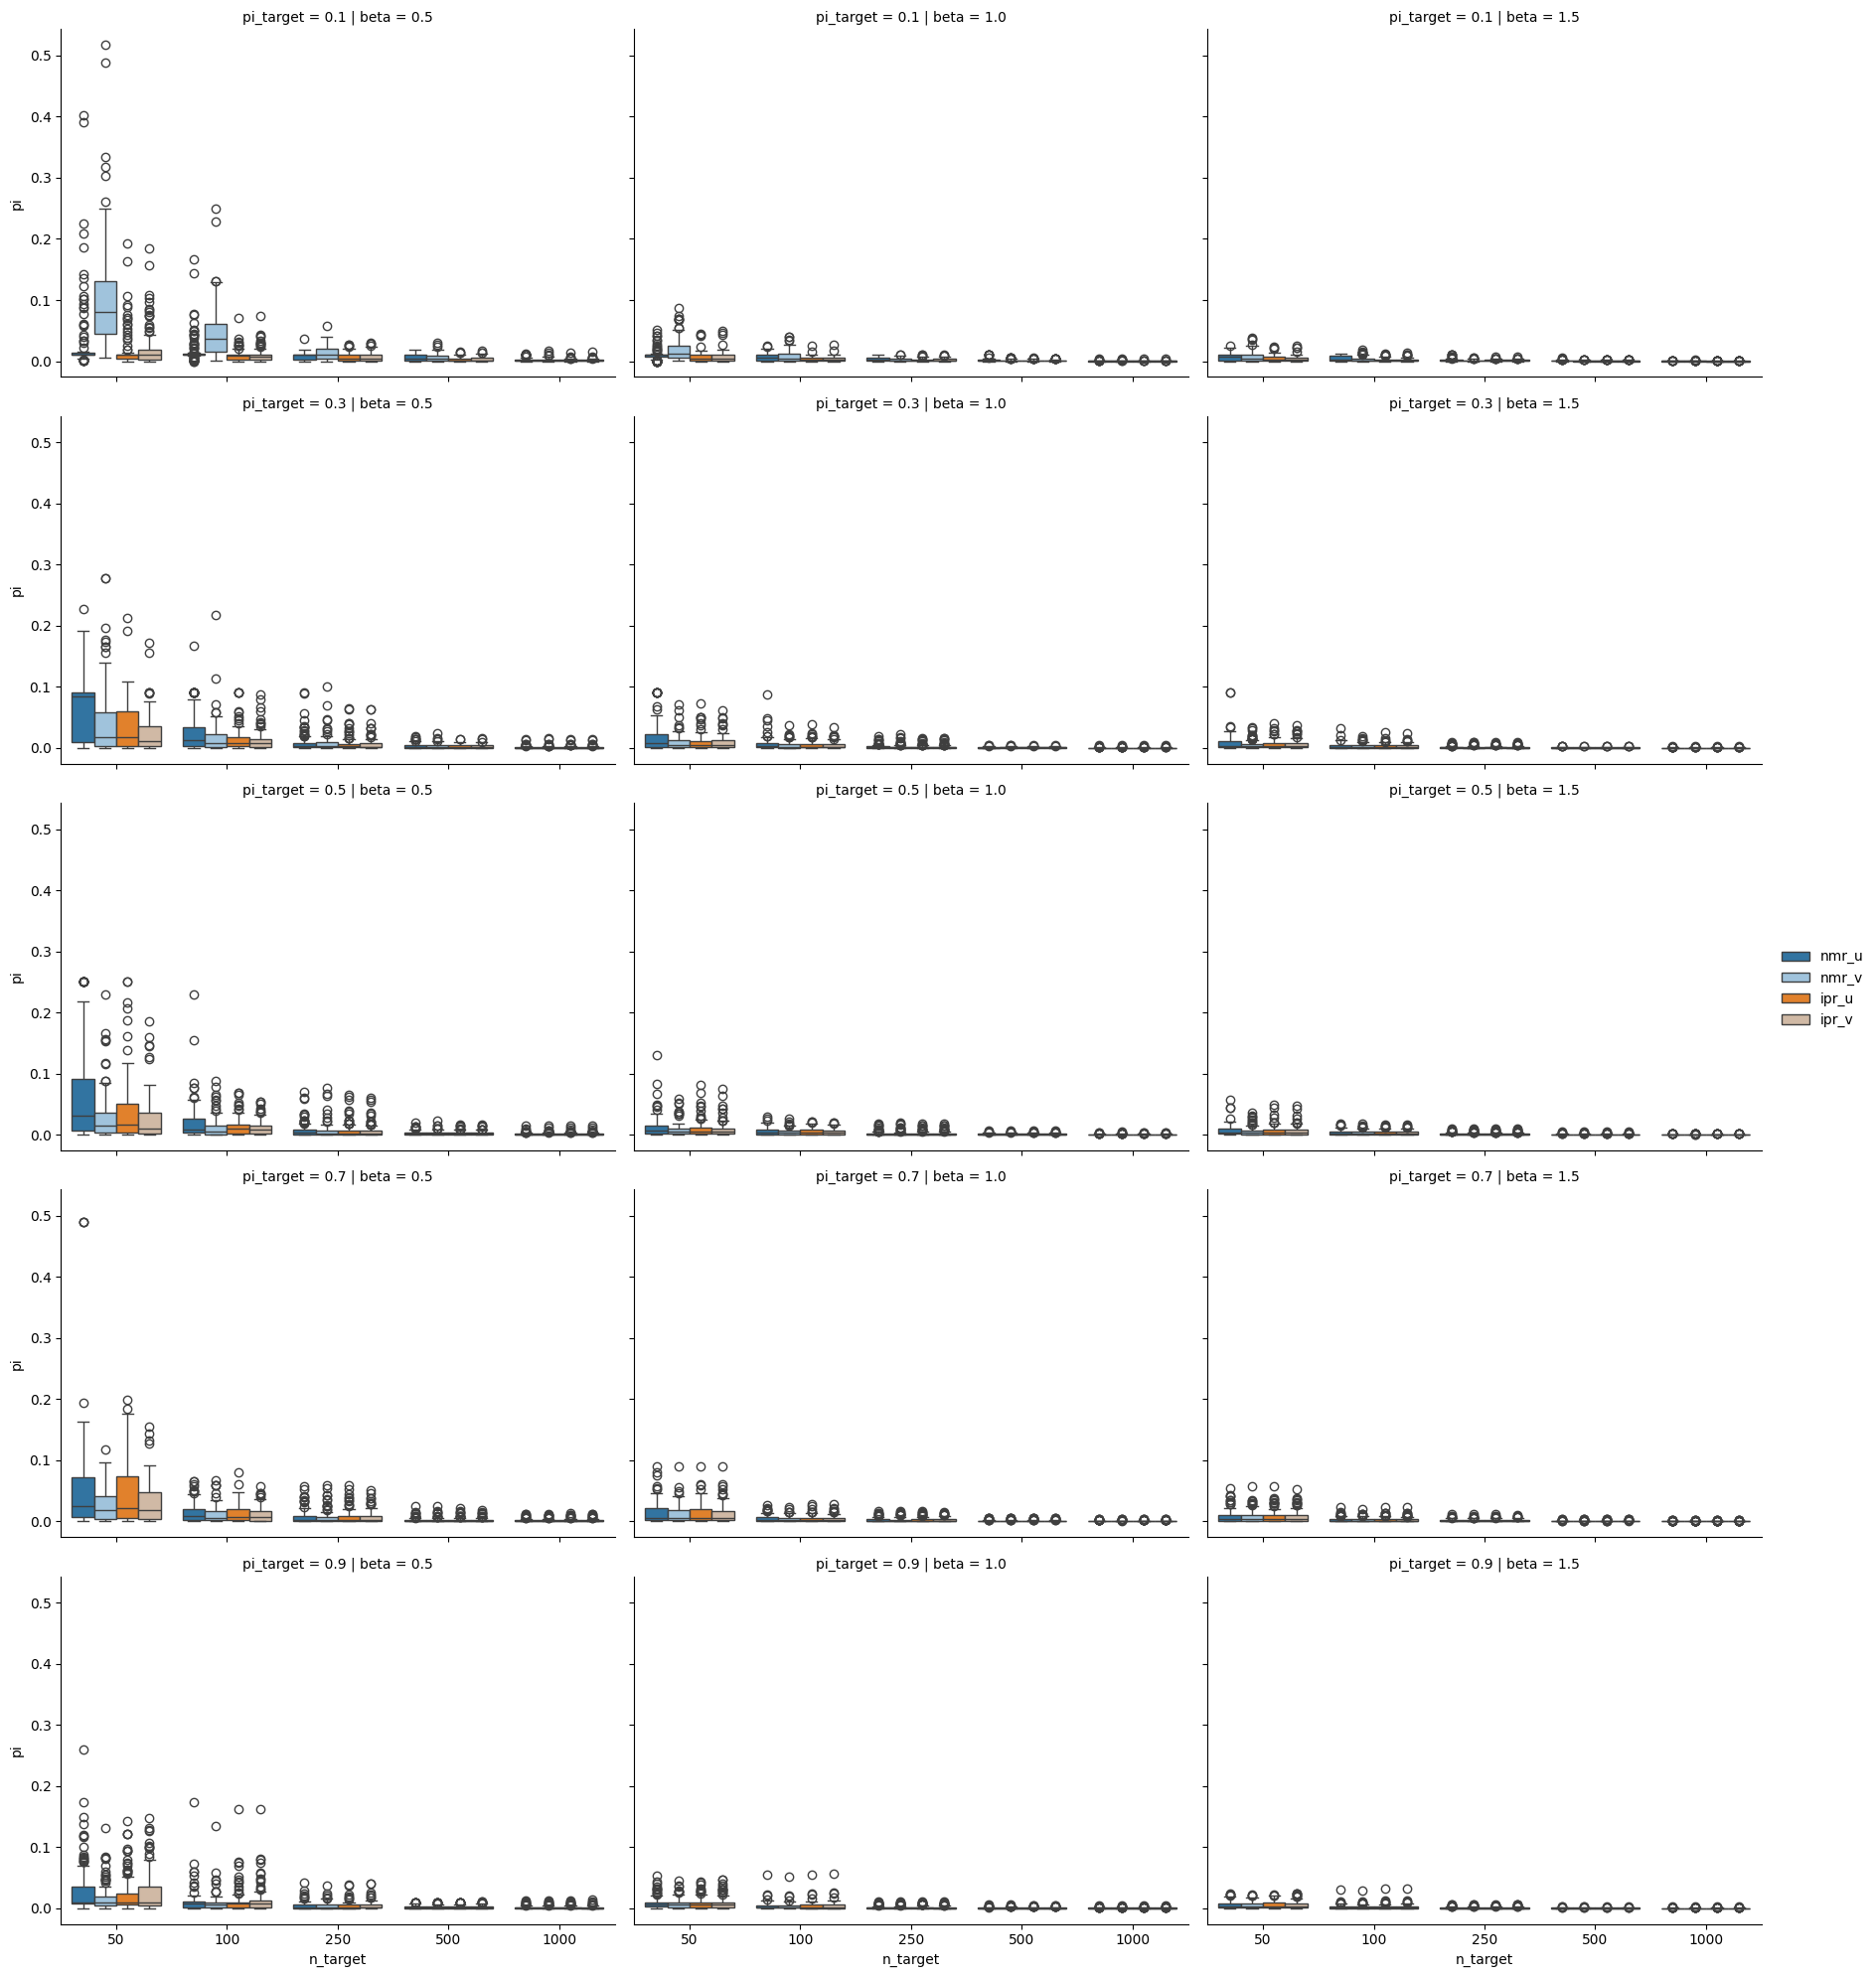

In [61]:
plot_boxplot_error_one(res, 'beta', df_params.keys().to_list())

In [164]:
# plot_boxplots(res, 'nmr', 'beta', df_params.keys().to_list())

In [165]:
# plot_boxplots_error(res, 'nmr', 'beta', df_params.keys().to_list())

In [166]:
# plot_boxplots(res, 'ipr', 'beta', df_params.keys().to_list())

In [167]:
# plot_boxplots_error(res, 'ipr', 'beta', df_params.keys().to_list())

# Std normal, Std normal: different p

In [187]:
params = {'beta': [1],
          'n_plus': [500],
          'n_minus': [500], 
          'n_target': [500], 
          'pi_target':[0.1, 0.3, 0.5, 0.7, 0.9],
          'p': [int(2), int(5), int(10), int(20), int(50), int(100)],
          'seed': [int(i) for i in np.linspace(1, 100, 100)]}

In [188]:
df_params = pd.DataFrame(itertools.product(*params.values()),columns=params.keys())

In [189]:
for n0 in [50, 100, 250, 1000]:
    params0 = {'beta': [1],
            'n_plus': [n0],
            'n_minus': [n0], 
            'n_target': [n0], 
            'pi_target': [0.1, 0.3, 0.5, 0.7, 0.9],
            'p': [int(2), int(5), int(10), int(20), int(50), int(100)],
            'seed': [int(i) for i in np.linspace(1, 100, 100)]}
    df_params0 = pd.DataFrame(itertools.product(*params0.values()),columns=params0.keys())
    df_params = pd.concat((df_params, df_params0), ignore_index=True)

In [190]:
res = simulation(df_params, generate_sample_Nstd_Nstd_CC, params.keys(), 
           ['pi_nmr_u', 'pi_ipr_u', 
            'pi_nmr_v', 'pi_ipr_v'])

100%|██████████| 15000/15000 [22:03<00:00, 11.33it/s] 


In [192]:
res.to_csv('01_simulation_UV_Neye_n.csv', index=False)

/tmp/ipykernel_743951/3227603918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["id"] = df.index


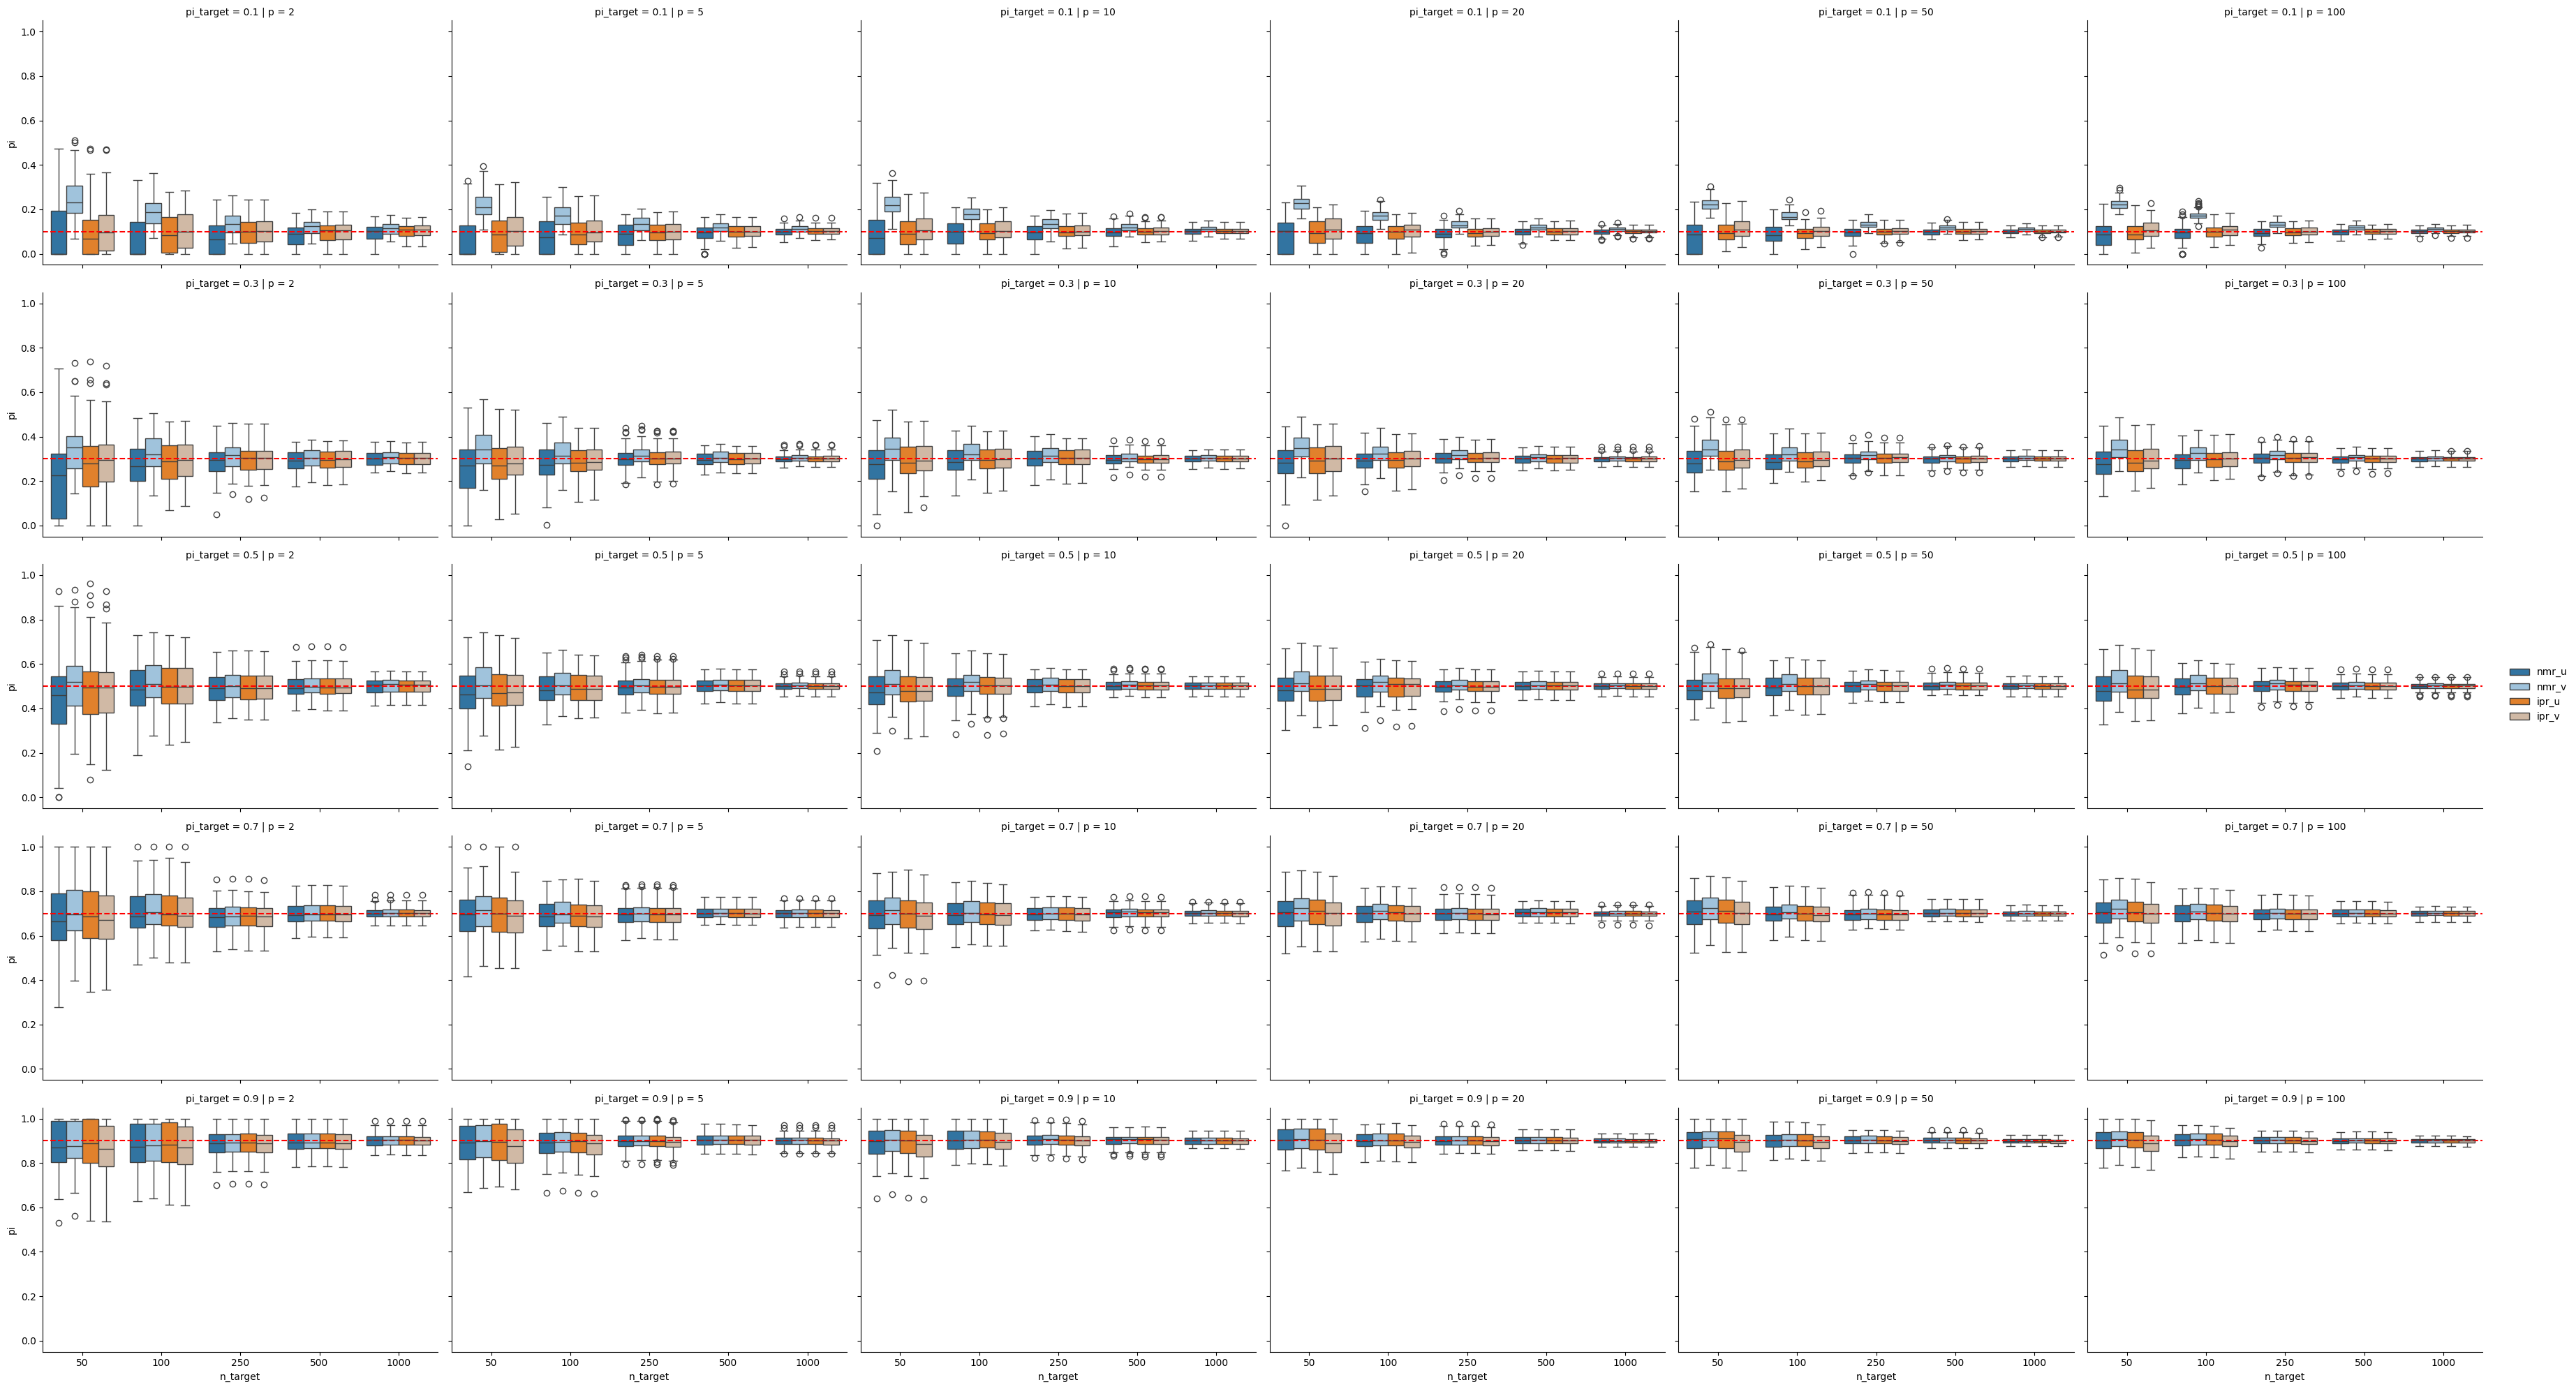

In [194]:
plot_boxplot_one(res, 'p', df_params.keys().to_list())

# Std-normal, AR: different means, changing rho in AR

In [174]:
params = {'beta': [1],
          'rho': [-0.5, -0.25, 0.25, 0.5],
          'n_plus': [500],
          'n_minus': [500], 
          'n_target': [500], 
          'pi_target': [0.1, 0.3, 0.5, 0.7, 0.9],
          'p': [int(5)],
          'seed': [int(i) for i in np.linspace(1, 100, 100)]}

In [175]:
df_params = pd.DataFrame(itertools.product(*params.values()),columns=params.keys())

In [176]:
for n0 in [50, 100, 250, 1000]:
    params0 = {'beta': [1],
          'rho': [-0.5, -0.25, 0.25, 0.5],
            'n_plus': [n0],
            'n_minus': [n0], 
            'n_target': [n0], 
            'pi_target': [0.1, 0.3, 0.5, 0.7, 0.9],
            'p': [int(5)],
            'seed': [int(i) for i in np.linspace(1, 100, 100)]}
    df_params0 = pd.DataFrame(itertools.product(*params0.values()),columns=params0.keys())
    df_params = pd.concat((df_params, df_params0), ignore_index=True)


In [177]:
res = simulation(df_params, generate_sample_Nstd_AR1_CC, params.keys(), 
           ['pi_nmr_u', 'pi_ipr_u', 
            'pi_nmr_v', 'pi_ipr_v'])

100%|██████████| 10000/10000 [11:18<00:00, 14.74it/s]


In [178]:
res.to_csv('01_simulation_UV_AR.csv', index=False)

/tmp/ipykernel_743951/3227603918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["id"] = df.index


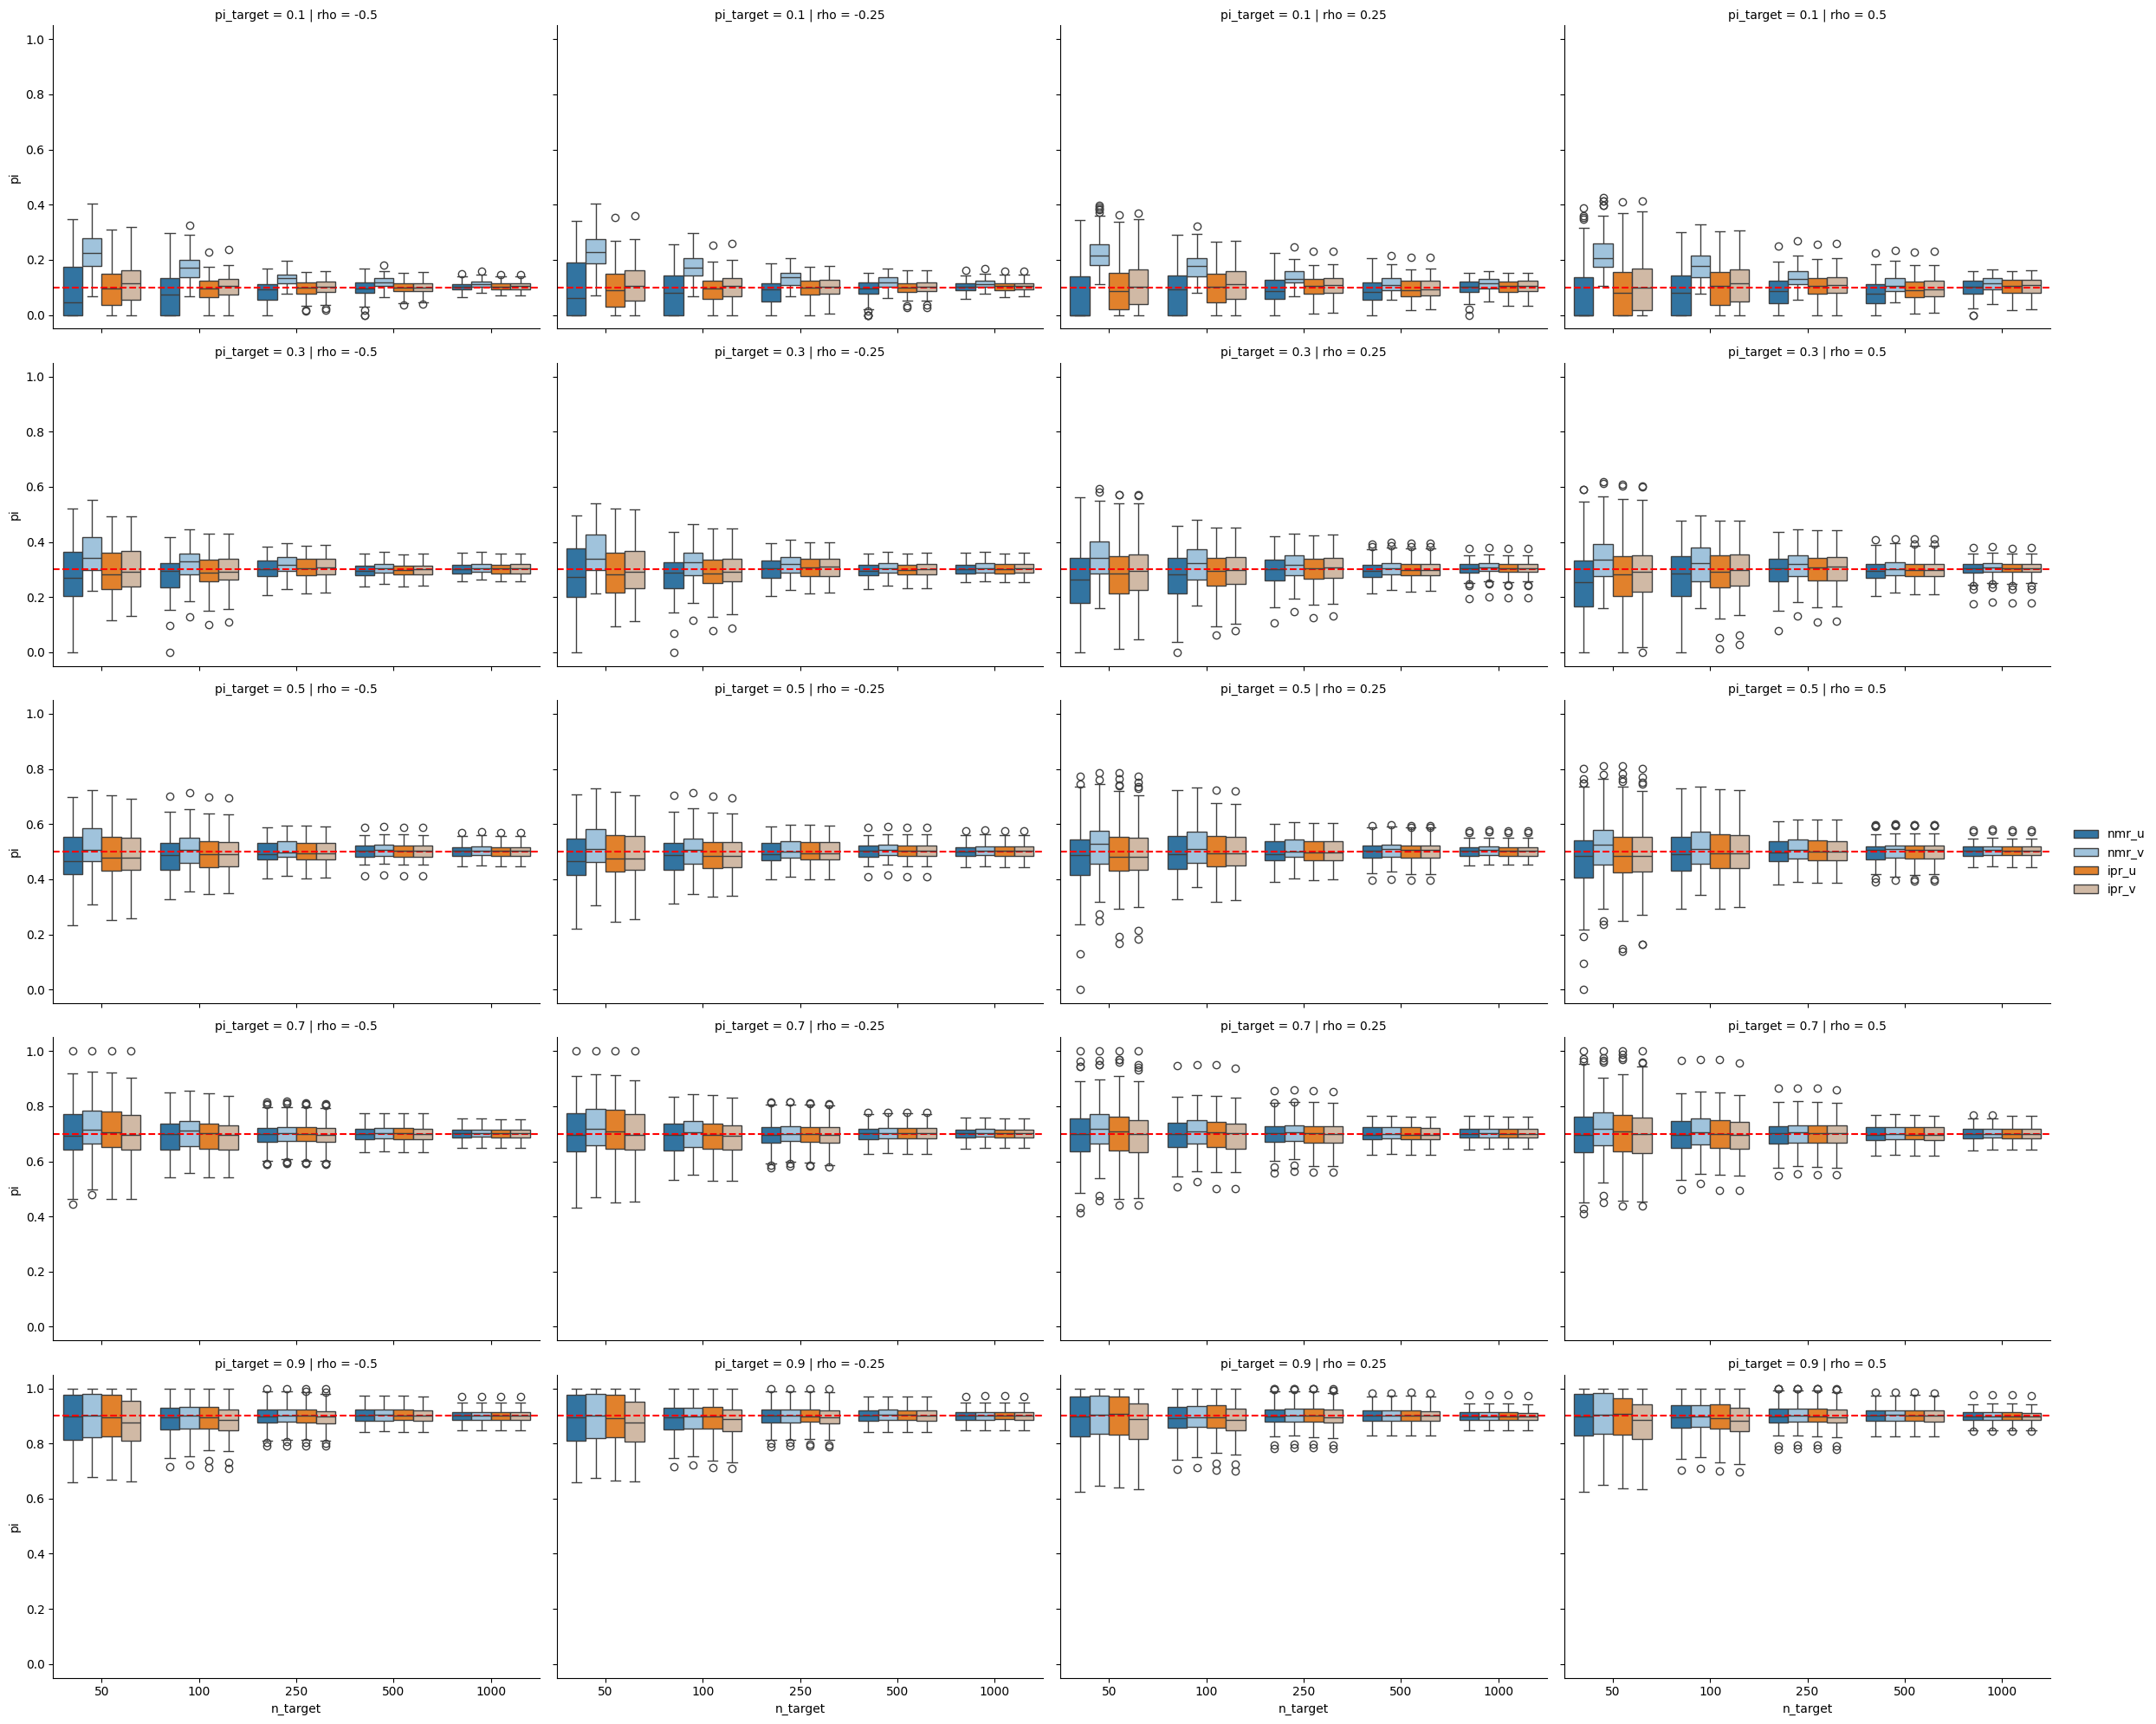

In [180]:
plot_boxplot_one(res, 'rho', df_params.keys().to_list())

/tmp/ipykernel_743951/3614799658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["id"] = df.index


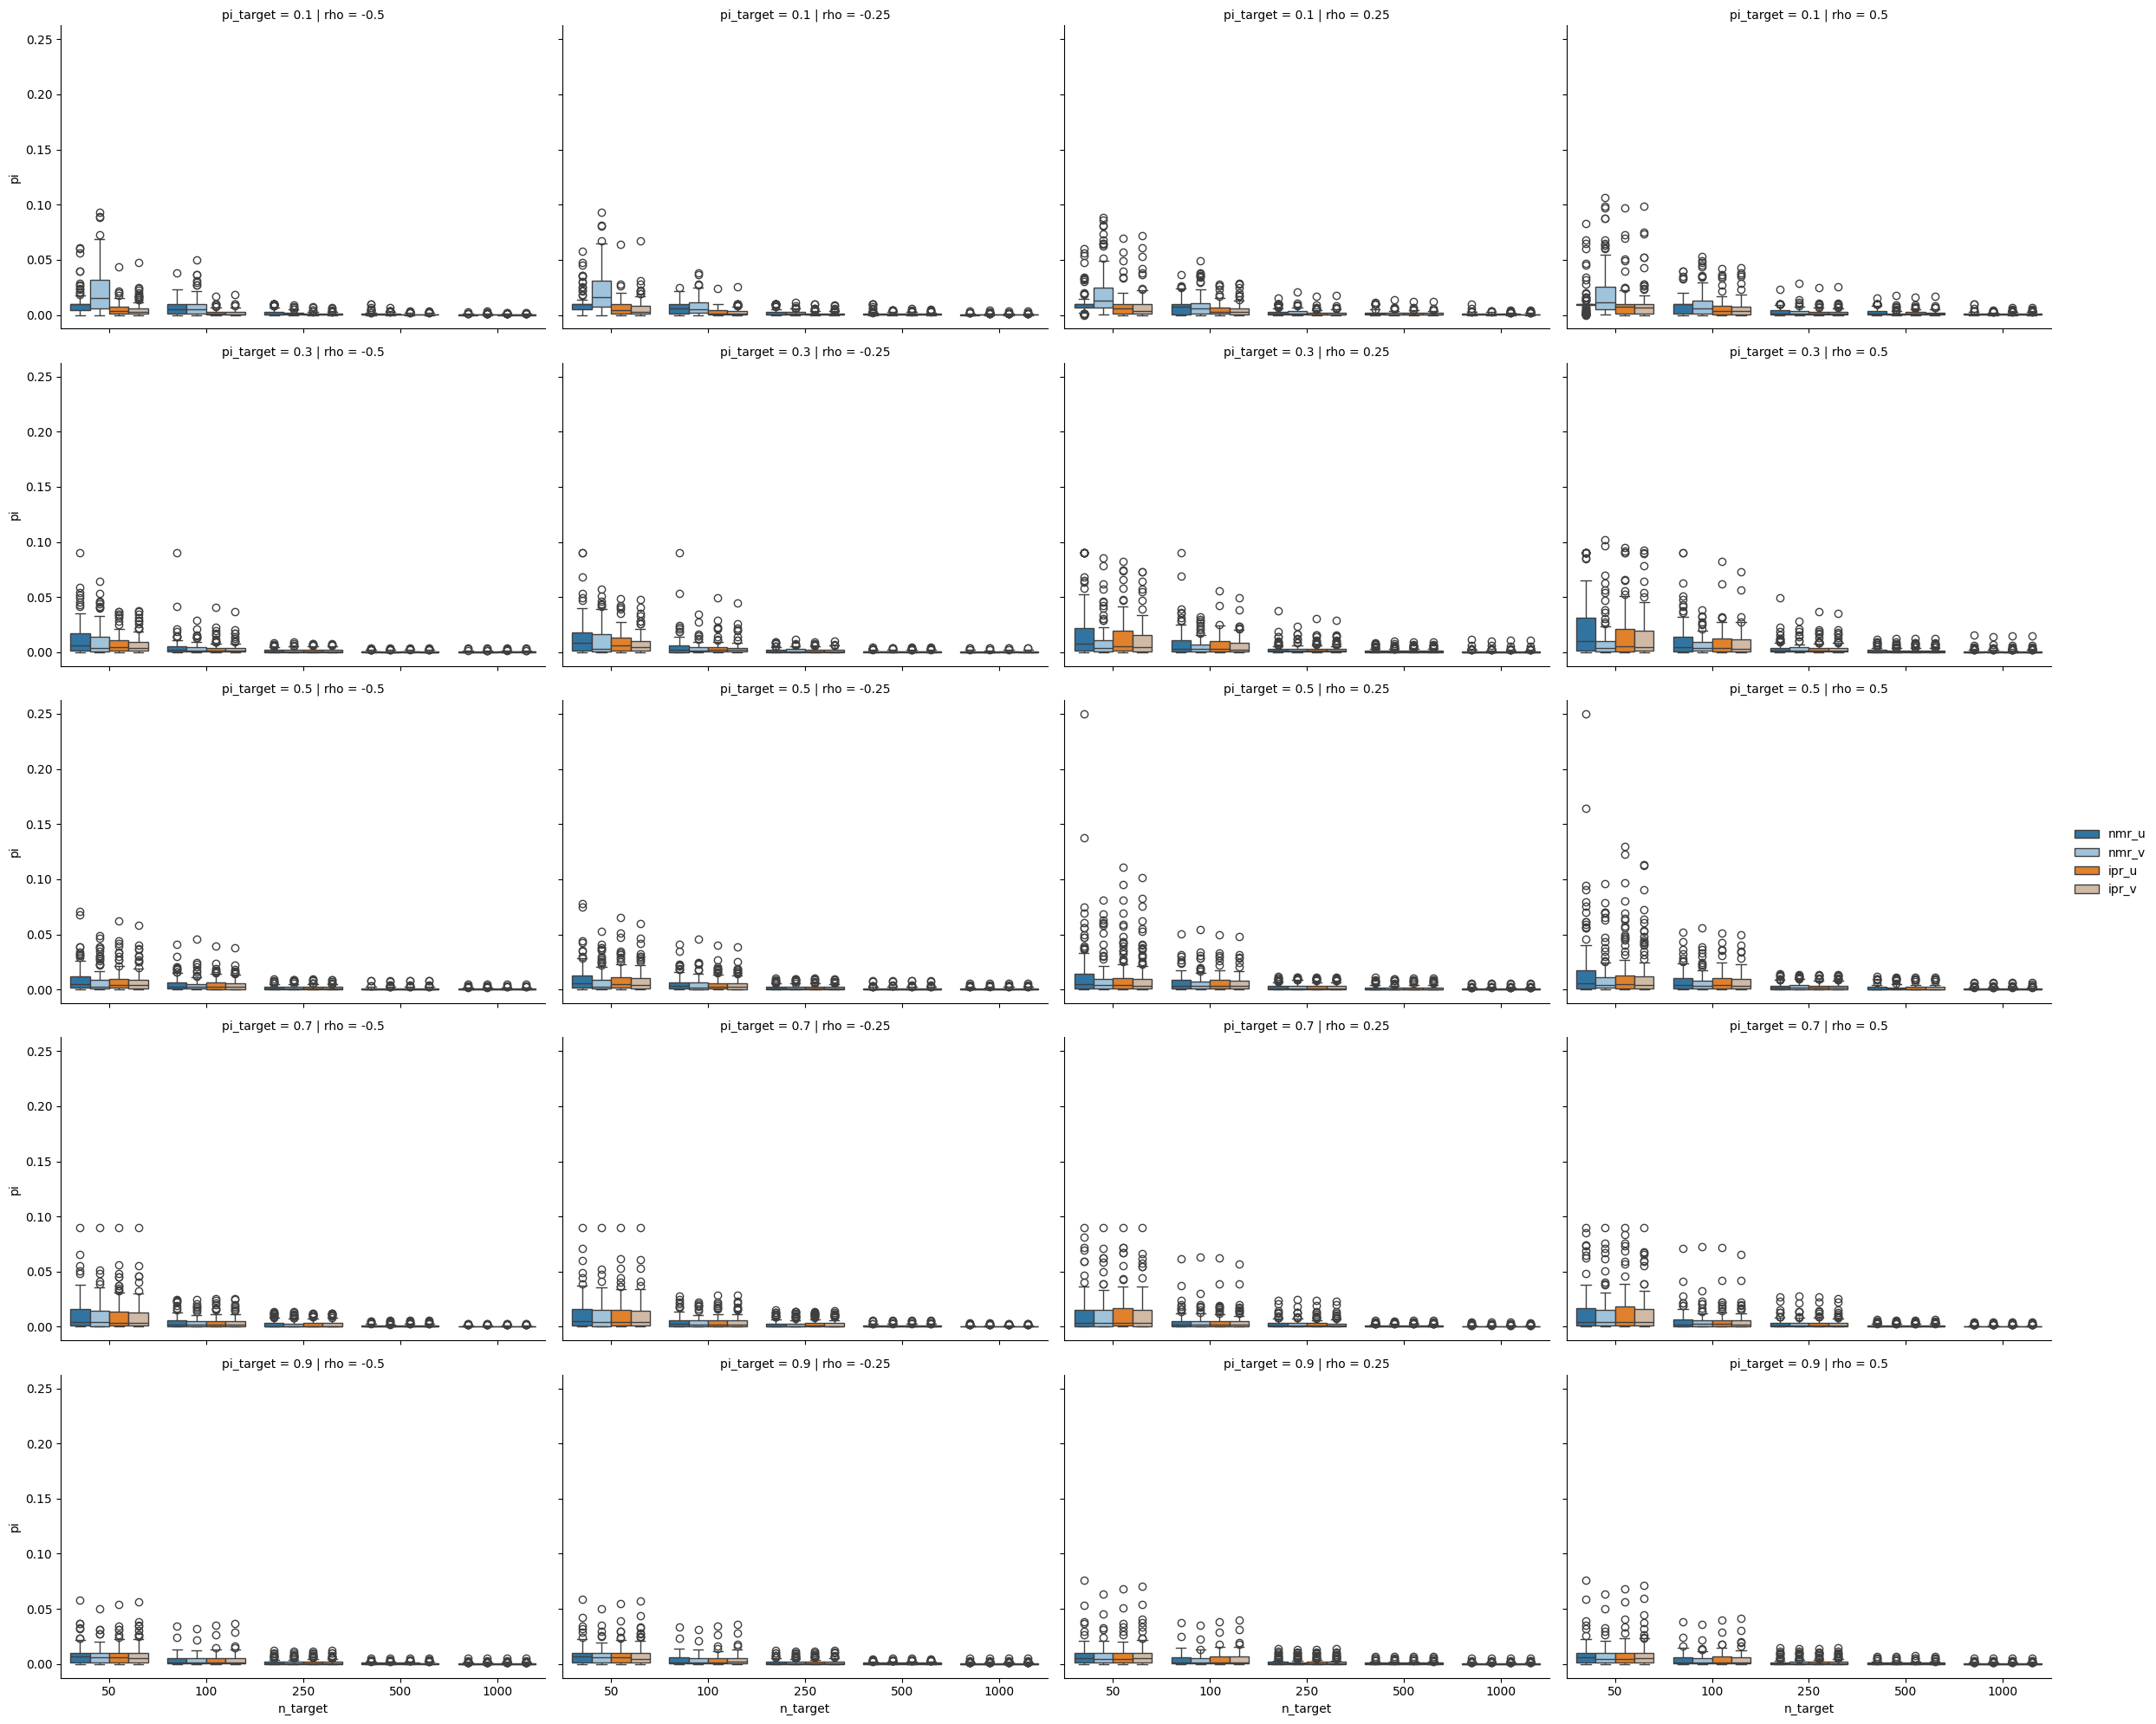

In [182]:
plot_boxplot_error_one(res, 'rho', df_params.keys().to_list())

# Std-normal, Std-normal: gamma

In [62]:
params = {'beta': [1],
          'n_plus': [500],
          'n_minus': [500], 
          'n_target': [500], 
          'pi_target': [0.1, 0.3, 0.5, 0.7, 0.9],
          'p': [int(5)],
          'seed': [int(i) for i in np.linspace(1, 10, 10)]}

In [63]:
df_params = pd.DataFrame(itertools.product(*params.values()),columns=params.keys())

In [64]:
for n0 in [50, 100, 250]:
    params0 = {'beta': [1],
            'n_plus': [n0],
            'n_minus': [n0], 
            'n_target': [n0], 
            'pi_target': [0.1, 0.3, 0.5, 0.7, 0.9],
            'p': [int(5)],
            'seed': [int(i) for i in np.linspace(1, 100, 100)]}
    df_params0 = pd.DataFrame(itertools.product(*params0.values()),columns=params0.keys())
    df_params = pd.concat((df_params, df_params0), ignore_index=True)


In [65]:
gamma_seq = np.linspace(0.005, 0.5, 10)

In [71]:
gamma_seq

array([0.005, 0.06 , 0.115, 0.17 , 0.225, 0.28 , 0.335, 0.39 , 0.445,
       0.5  ])

In [66]:
res = simulation_gamma(df_params, generate_sample_Nstd_Nstd_CC, params.keys(), gamma_seq,
           ['pi_nmr_u', 'pi_ipr_u', 
            'pi_nmr_v', 'pi_ipr_v', 
            'var_plug-in', 'var_explicit'])

100%|██████████| 1550/1550 [00:46<00:00, 33.28it/s]


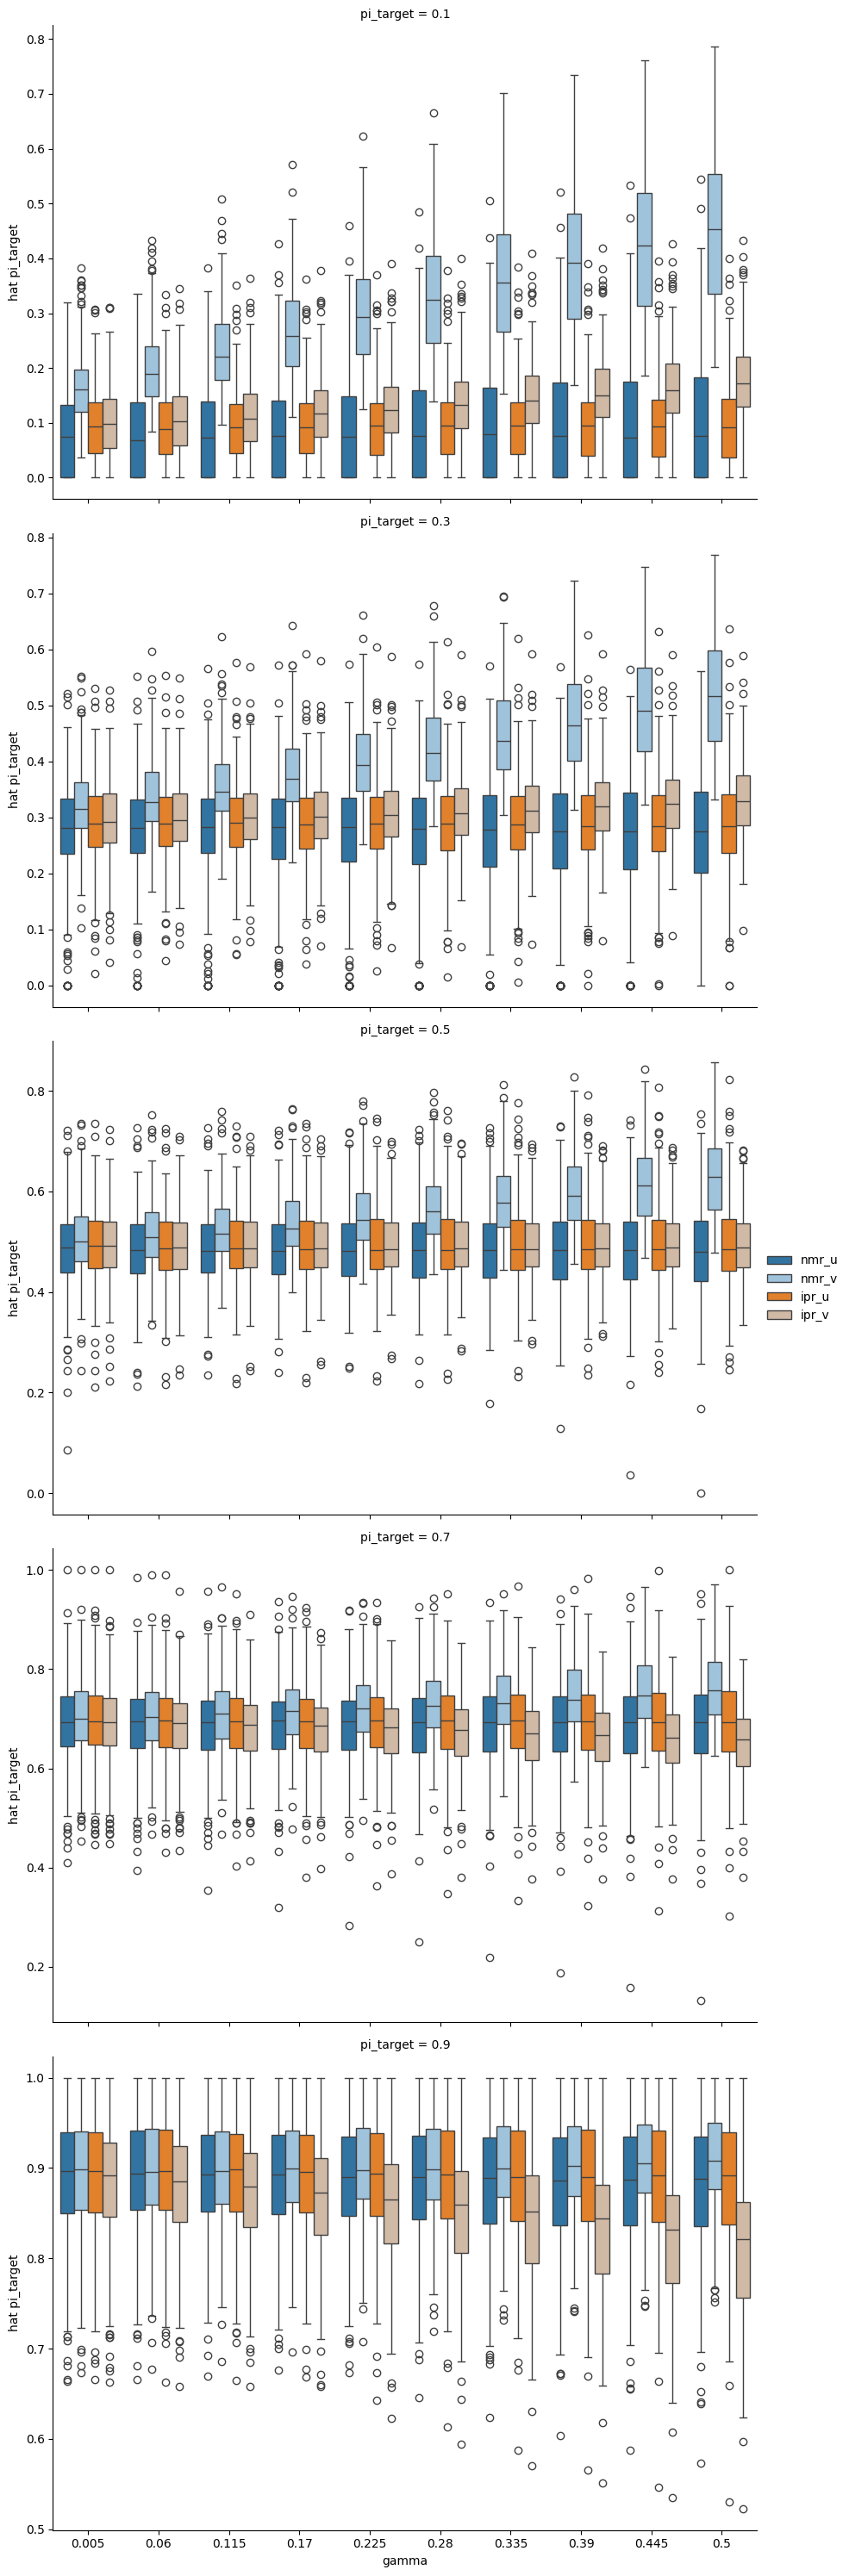

In [70]:
plot_boxplot_one_v2(res, 'gamma', list(params.keys())+['gamma'])